In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# ----- Monte Carlo Simulation Function -----
def simulate_queue(lambda_rate, mu, B, T_end, N_sim):
    """
    Monte Carlo simulation of a coffee shop queue.

    Parameters:
        lambda_rate : float
            Arrival rate (customers per minute)
        mu : float
            Service rate per barista (customers per minute)
        B : int
            Number of baristas
        T_end : float
            Time to check remaining customers (minutes after 5pm)
        N_sim : int
            Number of Monte Carlo simulations

    Returns:
        dict with keys:
            - p_zero: probability all customers served
            - expected_remaining: average number of customers not served
            - std_remaining: standard deviation
    """
    indicators = []
    remaining_customers = []

    for _ in range(N_sim):
        # 1. Sample number of arrivals before 5pm
        total_arrivals = np.random.poisson(lambda_rate * 60)

        if total_arrivals == 0:
            indicators.append(1)
            remaining_customers.append(0)
            continue

        # 2. Sample arrival times (cumulative exponential) <-- FIXED
        arrival_times = np.cumsum(np.random.exponential(1/lambda_rate, total_arrivals))

        # 3. Sample service times for each customer
        service_times = np.random.exponential(1/mu, total_arrivals)

        # 4. Initialize barista availability times
        barista_available = np.zeros(B)

        # 5. Assign each customer to the next available barista
        finish_times = []
        for arrival_time, s in zip(arrival_times, service_times):
            next_barista = np.argmin(barista_available)
            start_time = max(barista_available[next_barista], arrival_time)  # <-- FIXED
            finish_time = start_time + s
            barista_available[next_barista] = finish_time
            finish_times.append(finish_time)

        # 6. Count remaining customers not finished by T_end
        remaining = sum(finish_time > T_end for finish_time in finish_times)
        remaining_customers.append(remaining)

        # 7. Indicator: all customers finished
        indicators.append(1 if remaining == 0 else 0)

    return {
        'p_zero': np.mean(indicators),
        'expected_remaining': np.mean(remaining_customers),
        'std_remaining': np.std(remaining_customers)
    }

B	lambda/hr	p_zero	expected_remaining	std_remaining
2	6.0	0.661	0.676	1.396
2	12.0	0.872	0.336	1.231
2	18.0	0.801	0.691	1.965
2	24.0	0.599	1.963	3.465
2	30.0	0.336	4.725	5.367
2	36.0	0.147	8.885	6.976
2	42.0	0.046	14.087	7.981
2	48.0	0.010	19.671	8.584
2	54.0	0.002	25.255	8.958
2	60.0	0.000	31.341	9.246
3	6.0	0.685	0.408	0.746
3	12.0	0.947	0.063	0.312
3	18.0	0.976	0.041	0.350
3	24.0	0.941	0.134	0.759
3	30.0	0.837	0.472	1.545
3	36.0	0.655	1.532	3.296
3	42.0	0.425	3.603	5.130
3	48.0	0.232	7.114	7.208
3	54.0	0.103	11.676	8.837
3	60.0	0.036	17.202	9.802
4	6.0	0.688	0.384	0.666
4	12.0	0.948	0.054	0.234
4	18.0	0.993	0.007	0.085
4	24.0	0.992	0.009	0.097
4	30.0	0.974	0.037	0.303
4	36.0	0.929	0.147	0.834
4	42.0	0.842	0.442	1.555
4	48.0	0.677	1.265	2.997
4	54.0	0.484	2.901	4.803
4	60.0	0.287	5.962	7.016
5	6.0	0.696	0.371	0.627
5	12.0	0.950	0.052	0.228
5	18.0	0.995	0.005	0.069
5	24.0	0.998	0.002	0.047
5	30.0	0.997	0.003	0.058
5	36.0	0.989	0.012	0.116
5	42.0	0.966	0.054	0.427
5	48.0	0.919	0.144	0.

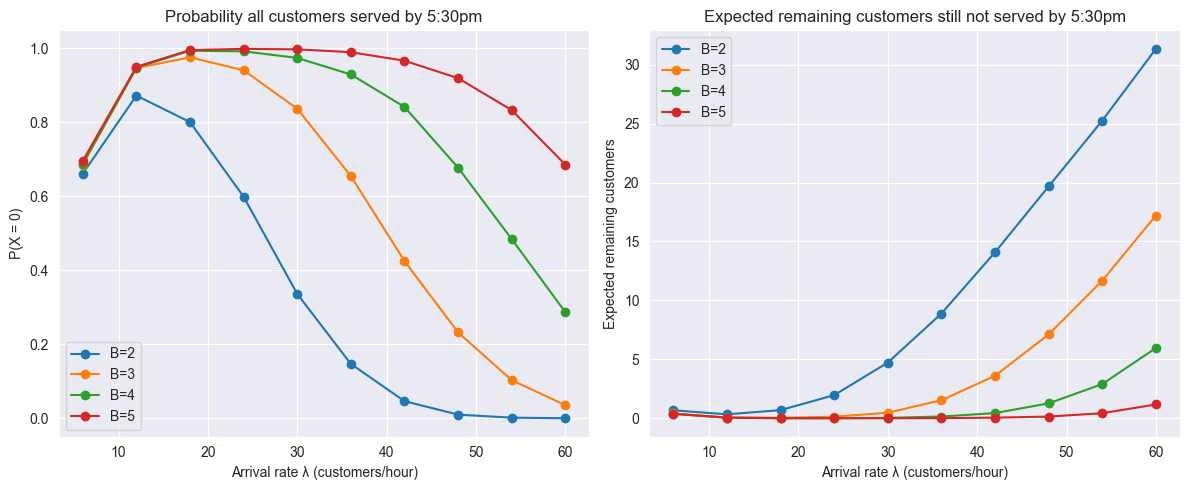

In [20]:
# ----- Parameters -----
mu = 0.5              # service rate (customers per min)
T_end = 30            # minutes after 5pm
N_sim = 5000          # number of Monte Carlo simulations
lambda_list = np.array([0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])  # arrivals/min
B_list = [2, 3, 4, 5]    # baristas for the three scenarios

# ----- Run simulations for each scenario -----
results = {B:{} for B in B_list}
for B in B_list:
    for lam in lambda_list:
        results[B][lam] = simulate_queue(lam, mu, B, T_end, N_sim)

# ----- Print summary for checking -----
print("B\tlambda/hr\tp_zero\texpected_remaining\tstd_remaining")
for B in B_list:
    for lam in lambda_list:
        res = results[B][lam]
        print(f"{B}\t{lam*60:.1f}\t{res['p_zero']:.3f}\t{res['expected_remaining']:.3f}\t{res['std_remaining']:.3f}")

# ----- Plotting -----
plt.figure(figsize=(12,5))

# Left panel: P(X=0)
plt.subplot(1,2,1)
for B in B_list:
    p_zero_list = [results[B][lam]['p_zero'] for lam in lambda_list]
    plt.plot(lambda_list*60, p_zero_list, 'o-', label=f'B={B}')
plt.xlabel("Arrival rate λ (customers/hour)")
plt.ylabel("P(X = 0)")
plt.title("Probability all customers served by 5:30pm")
plt.grid(True)
plt.legend()

# Right panel: Expected remaining ± std
plt.subplot(1,2,2)
for B in B_list:
    expected_list = [results[B][lam]['expected_remaining'] for lam in lambda_list]
    plt.plot(lambda_list*60, expected_list, 'o-', label=f'B={B}')
plt.xlabel("Arrival rate λ (customers/hour)")
plt.ylabel("Expected remaining customers")
plt.title("Expected remaining customers still not served by 5:30pm")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
def simulate_queue(lambda_rate, mu, B, T_end, N_sim):
    indicators = []
    remaining_customers = []

    for _ in range(N_sim):
        total_arrivals = np.random.poisson(lambda_rate * 60)
        # Sample *arrival times*
        arrival_times = np.sort(np.random.uniform(0, 60, size=total_arrivals))
        service_times = np.random.exponential(1/mu, total_arrivals)
        barista_available = np.zeros(B)

        finish_times = []
        for arrival, service in zip(arrival_times, service_times):
            next_barista = np.argmin(barista_available)
            # ✅ Respect arrival times
            start_time = max(barista_available[next_barista], arrival)
            finish_time = start_time + service
            barista_available[next_barista] = finish_time
            finish_times.append(finish_time)

        remaining = sum(f > T_end for f in finish_times)
        remaining_customers.append(remaining)
        indicators.append(1 if remaining == 0 else 0)

    return {
        'p_zero': np.mean(indicators),
        'expected_remaining': np.mean(remaining_customers),
        'std_remaining': np.std(remaining_customers)
    }


B	lambda/hr	avg_arrivals	p_zero	prop_nonzero_remaining	exp_remaining


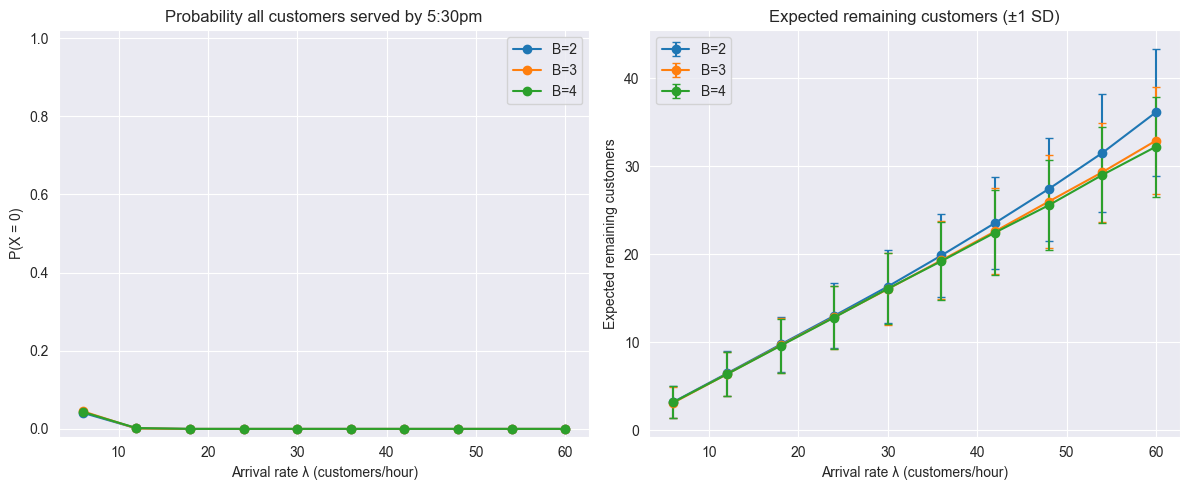

In [10]:
# ----- Parameters -----
mu = 0.5                   # service rate (customers per minute) -> mean service time 2.0 min
T_arrival = 60.0           # arrivals during 60 minutes (until 5pm)
T_after = 30.0             # minutes after 5pm to keep serving -> check at 5:30pm
N_sim = 5000
lambda_list = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])  # arrivals per minute
B_list = [2, 3, 4]

# ----- Run simulations for each scenario -----
results = {B: {} for B in B_list}
for B in B_list:
    for lam in lambda_list:
        # use a seed that depends on parameters for reproducibility if desired
        res = simulate_queue(lam, mu, B, T_after, N_sim)
        results[B][lam] = res

# quick diagnostic table (print a few lines)
print("B\tlambda/hr\tavg_arrivals\tp_zero\tprop_nonzero_remaining\texp_remaining")
for B in B_list:
    for lam in lambda_list:
        r = results[B][lam]
        #print(f"{B}\t{lam*60:5.1f}\t\t{r['avg_arrivals']:.2f}\t\t{r['p_zero']:.3f}\t{r['prop_nonzero_remaining']:.3f}\t\t{r['expected_remaining']:.3f}")

# ----- Plotting -----
plt.figure(figsize=(12,5))

# Left panel: P(X=0)
plt.subplot(1,2,1)
for B in B_list:
    p_zero_list = [results[B][lam]['p_zero'] for lam in lambda_list]
    plt.plot(lambda_list*60, p_zero_list, 'o-', label=f'B={B}')
plt.xlabel("Arrival rate λ (customers/hour)")
plt.ylabel("P(X = 0)")
plt.title("Probability all customers served by 5:30pm")
plt.ylim(-0.02, 1.02)
plt.grid(True)
plt.legend()

# Right panel: Expected remaining ± std
plt.subplot(1,2,2)
for B in B_list:
    expected_list = [results[B][lam]['expected_remaining'] for lam in lambda_list]
    std_list = [results[B][lam]['std_remaining'] for lam in lambda_list]
    plt.errorbar(lambda_list*60, expected_list, yerr=std_list, fmt='o-', capsize=3, label=f'B={B}')
plt.xlabel("Arrival rate λ (customers/hour)")
plt.ylabel("Expected remaining customers")
plt.title("Expected remaining customers (±1 SD)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
